In [19]:
import pandas as pd
df= pd.read_csv('movies_imdb.csv')
df.head()

,Unnamed: 0,Title,Certificate,Duration,Genre,Rate,Metascore,Description,Cast,Info
0,0,1. The Shawshank Redemption (1994),R,142 min,Drama,9.3,80.0,Two imprisoned men bond over a number of years...,"Director: Frank Darabont | Stars: Tim Robbins,...","Votes: 2,295,987 | Gross: $28.34M"
1,1,2. The Godfather (1972),R,175 min,"Crime, Drama",9.2,100.0,The aging patriarch of an organized crime dyna...,Director: Francis Ford Coppola | Stars: Marlon...,"Votes: 1,584,782 | Gross: $134.97M"
2,2,3. The Dark Knight (2008),PG-13,152 min,"Action, Crime, Drama",9.0,84.0,When the menace known as the Joker wreaks havo...,Director: Christopher Nolan | Stars: Christian...,"Votes: 2,260,649 | Gross: $534.86M"
3,3,4. The Godfather: Part II (1974),R,202 min,"Crime, Drama",9.0,90.0,The early life and career of Vito Corleone in ...,Director: Francis Ford Coppola | Stars: Al Pac...,"Votes: 1,107,253 | Gross: $57.30M"
4,4,5. The Lord of the Rings: The Return of the Ki...,PG-13,201 min,"Action, Adventure, Drama",8.9,94.0,Gandalf and Aragorn lead the World of Men agai...,"Director: Peter Jackson | Stars: Elijah Wood, ...","Votes: 1,614,369 | Gross: $377.85M"


In [20]:
print(df.isnull().sum())

Unnamed: 0       0
Title            0
Certificate     27
Duration         0
Genre            0
Rate             0
Metascore      288
Description      0
Cast             0
Info             0
dtype: int64


In [21]:
print("same rows:", df['Title'].duplicated().sum())


same rows: 602


In [22]:

most_frequent_value = df['Certificate'].mode()[0]
df['Certificate'].fillna(most_frequent_value, inplace=True)
print(df['Certificate'].isnull().sum())

df['Metascore'].fillna(df['Metascore'].median(), inplace=True)
print(df.isnull().sum())

0
Unnamed: 0     0
Title          0
Certificate    0
Duration       0
Genre          0
Rate           0
Metascore      0
Description    0
Cast           0
Info           0
dtype: int64


C:\Users\Baki Akgun\New folder\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Baki Akgun\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


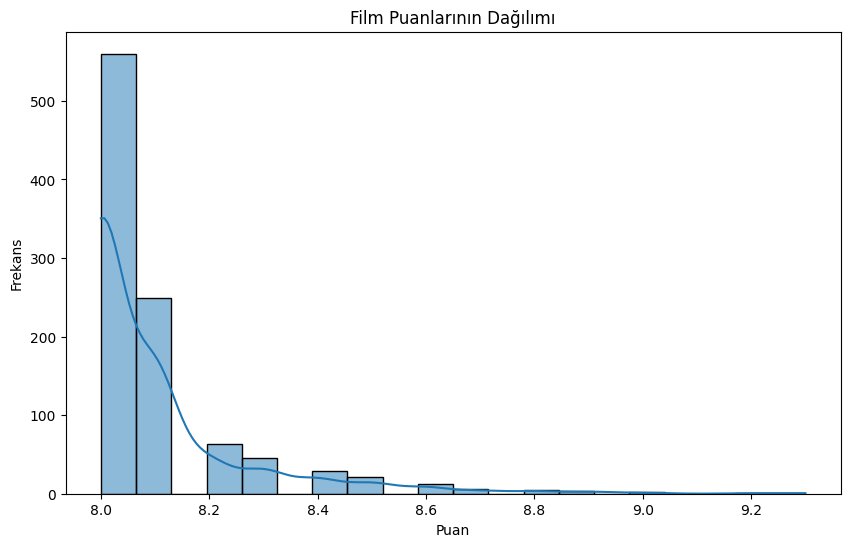

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Rate'], bins=20, kde=True)
plt.title('Film Puanlarının Dağılımı')
plt.xlabel('Puan')
plt.ylabel('Frekans')
plt.show()

In [24]:
#year 
import re

# df = pd.read_csv('path_to_your_imdb_top_1000.csv')

# year info from 'Title' columns
def extract_year(title):
    match = re.search(r'\((\d{4})\)', title)
    if match:
        return match.group(1)
    return None

df['Year'] = df['Title'].apply(extract_year)

# results
print(df[['Title', 'Year']].head())



                                               Title  Year
0                 1. The Shawshank Redemption (1994)  1994
1                            2. The Godfather (1972)  1972
2                          3. The Dark Knight (2008)  2008
3                   4. The Godfather: Part II (1974)  1974
4  5. The Lord of the Rings: The Return of the Ki...  2003


C:\Users\Baki Akgun\New folder\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Baki Akgun\New folder\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Baki Akgun\New folder\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


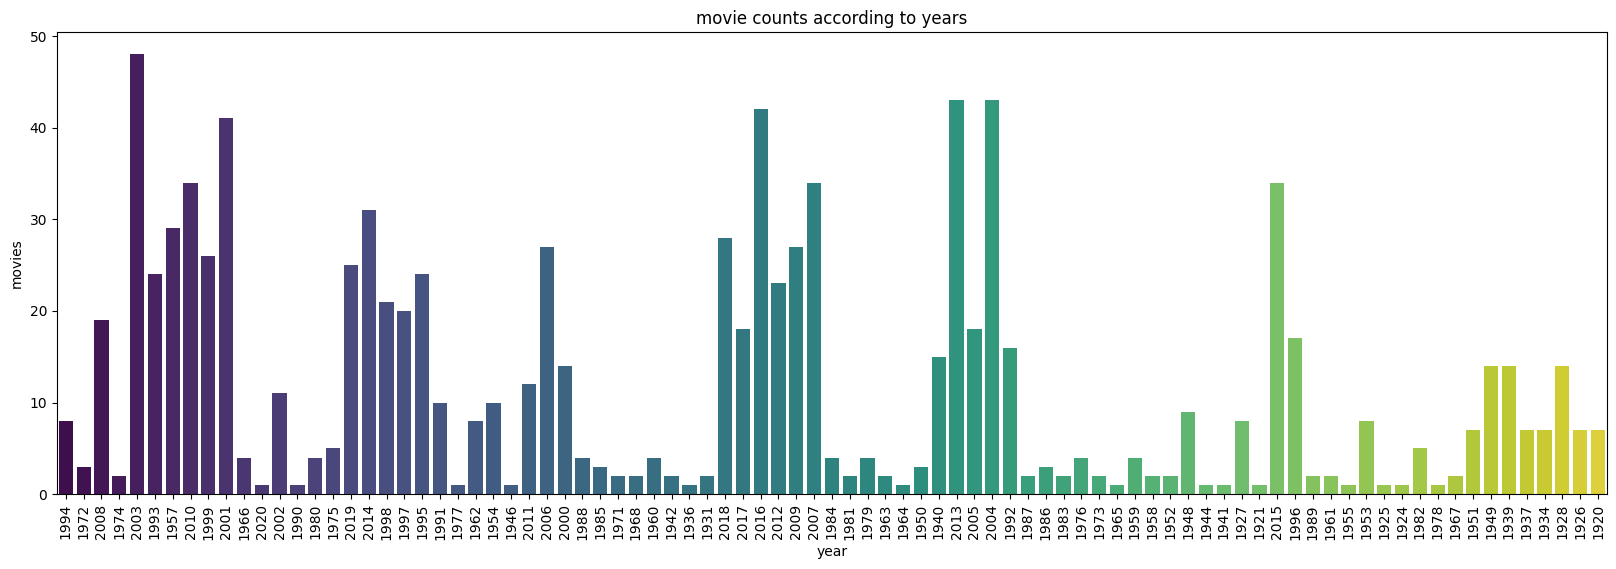

In [25]:
plt.figure(figsize=(20,6))
sns.countplot(x='Year', data=df,palette='viridis')
plt.xticks(rotation=90)
plt.title('movie counts according to years')
plt.xlabel('year')
plt.ylabel('movies')
plt.show()

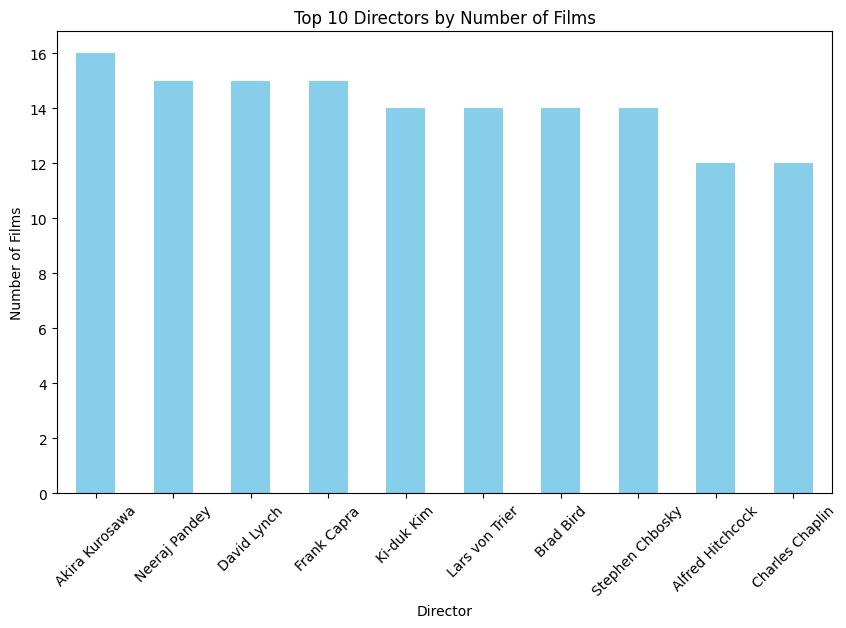

In [26]:
#director name info
def extract_director(cast):
    match = re.search(r'Director: ([^|]+)', cast)
    if match:
        return match.group(1).strip()
    return None

#director column
df['Director'] = df['Cast'].apply(extract_director)

director_counts = df['Director'].value_counts()


top_10_directors = director_counts.head(10)


plt.figure(figsize=(10, 6))
top_10_directors.plot(kind='bar', color='skyblue')
plt.title('Top 10 Directors by Number of Films')
plt.xlabel('Director')
plt.ylabel('Number of Films')
plt.xticks(rotation=45)
plt.show()

C:\Users\Baki Akgun\New folder\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Baki Akgun\New folder\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Baki Akgun\New folder\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


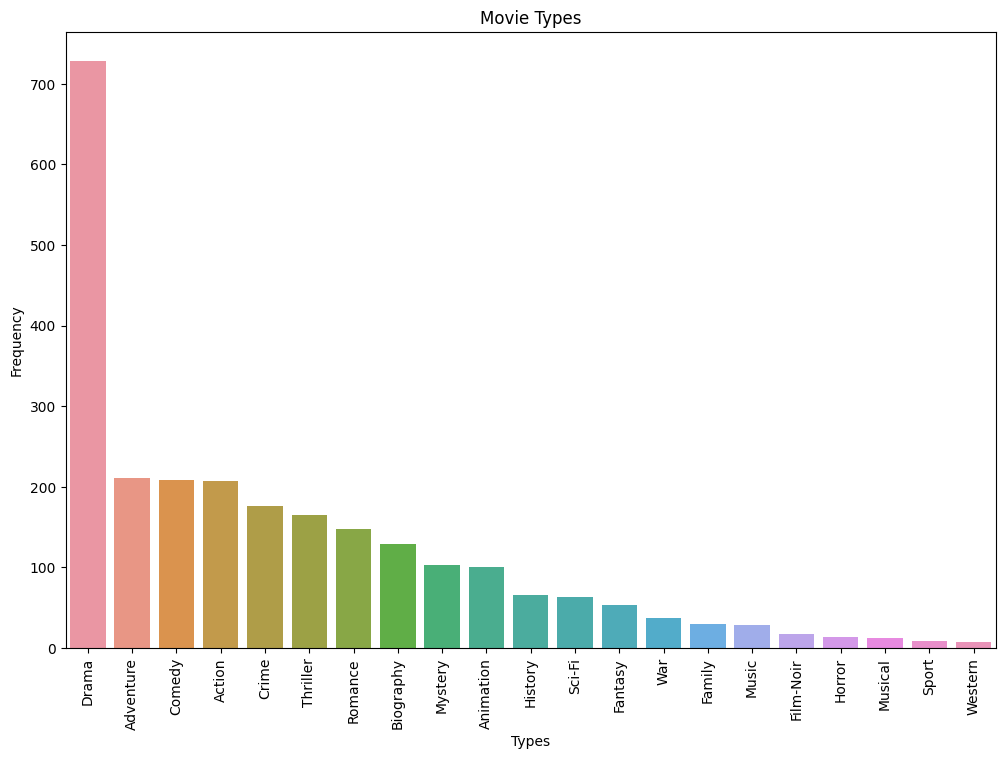

In [27]:

# string values convet to list in Genre column
df['Genre'] = df['Genre'].apply(lambda x: x.split(', ') if isinstance(x, str) else x)

# Split to rows the list
genre_counts = df['Genre'].explode().value_counts()

# Vissualize
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.xticks(rotation=90)
plt.title('Movie Types')
plt.xlabel('Types')
plt.ylabel('Frequency')
plt.show()

In [28]:
df.head()

,Unnamed: 0,Title,Certificate,Duration,Genre,Rate,Metascore,Description,Cast,Info,Year,Director
0,0,1. The Shawshank Redemption (1994),R,142 min,[Drama],9.3,80.0,Two imprisoned men bond over a number of years...,"Director: Frank Darabont | Stars: Tim Robbins,...","Votes: 2,295,987 | Gross: $28.34M",1994,Frank Darabont
1,1,2. The Godfather (1972),R,175 min,"[Crime, Drama]",9.2,100.0,The aging patriarch of an organized crime dyna...,Director: Francis Ford Coppola | Stars: Marlon...,"Votes: 1,584,782 | Gross: $134.97M",1972,Francis Ford Coppola
2,2,3. The Dark Knight (2008),PG-13,152 min,"[Action, Crime, Drama]",9.0,84.0,When the menace known as the Joker wreaks havo...,Director: Christopher Nolan | Stars: Christian...,"Votes: 2,260,649 | Gross: $534.86M",2008,Christopher Nolan
3,3,4. The Godfather: Part II (1974),R,202 min,"[Crime, Drama]",9.0,90.0,The early life and career of Vito Corleone in ...,Director: Francis Ford Coppola | Stars: Al Pac...,"Votes: 1,107,253 | Gross: $57.30M",1974,Francis Ford Coppola
4,4,5. The Lord of the Rings: The Return of the Ki...,PG-13,201 min,"[Action, Adventure, Drama]",8.9,94.0,Gandalf and Aragorn lead the World of Men agai...,"Director: Peter Jackson | Stars: Elijah Wood, ...","Votes: 1,614,369 | Gross: $377.85M",2003,Peter Jackson


In [29]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [30]:
pip install pyfpgrowth


Note: you may need to restart the kernel to use updated packages.


In [31]:
pip install efficient-apriori

Note: you may need to restart the kernel to use updated packages.


In [32]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import pyfpgrowth

# split description texts to words
transactions = df['Description'].apply(lambda x: x.split()).tolist()

# check words
transactions = [[word for word in transaction if 2 <= len(word) <= 15] for transaction in transactions]

# examples
print(transactions[:2])

[['Two', 'imprisoned', 'men', 'bond', 'over', 'number', 'of', 'years,', 'finding', 'solace', 'and', 'eventual', 'redemption', 'through', 'acts', 'of', 'common', 'decency.'], ['The', 'aging', 'patriarch', 'of', 'an', 'organized', 'crime', 'dynasty', 'transfers', 'control', 'of', 'his', 'clandestine', 'empire', 'to', 'his', 'reluctant', 'son.']]


In [33]:
# convert the data to binary using Transaction encoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_te = pd.DataFrame(te_ary, columns=te.columns_)

# most frequated data cluster with apriori algorithm
frequent_itemsets = apriori(df_te, min_support=0.01, use_colnames=True)

# accociate rule
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules = rules.sort_values(by='lift', ascending=False)

print(rules.head())


             antecedents          consequents  antecedent support  \
45161  (to, for, forced)      (the, Japanese)               0.014   
80904     (his, she, an)  (who, all, for, of)               0.014   
53969   (must, city, of)        (and, artist)               0.014   
53967  (and, city, must)         (artist, of)               0.014   
76986   (for, when, she)     (their, has, is)               0.014   

       consequent support  support  confidence       lift  leverage  \
45161               0.014    0.014         1.0  71.428571  0.013804   
80904               0.014    0.014         1.0  71.428571  0.013804   
53969               0.014    0.014         1.0  71.428571  0.013804   
53967               0.014    0.014         1.0  71.428571  0.013804   
76986               0.014    0.014         1.0  71.428571  0.013804   

       conviction  zhangs_metric  
45161         inf            1.0  
80904         inf            1.0  
53969         inf            1.0  
53967         inf 

In [37]:
df.tail(20)

,Unnamed: 0,Title,Certificate,Duration,Genre,Rate,Metascore,Description,Cast,Info,Year,Director
980,980,383. Dancer in the Dark (2000),R,140 min,"[Crime, Drama, Musical]",8.0,61.0,An East European girl travels to the United St...,"Director: Lars von Trier | Stars: Björk, Cathe...","Votes: 100,634 | Gross: $4.18M",2000,Lars von Trier
981,981,384. Mulholland Drive (2001),R,147 min,"[Drama, Mystery, Thriller]",8.0,85.0,After a car wreck on the winding Mulholland Dr...,"Director: David Lynch | Stars: Naomi Watts, La...","Votes: 315,529 | Gross: $7.22M",2001,David Lynch
982,982,385. The Straight Story (1999),G,112 min,"[Biography, Drama]",8.0,86.0,An old man makes a long journey by lawnmower t...,Director: David Lynch | Stars: Richard Farnswo...,"Votes: 80,521 | Gross: $6.20M",1999,David Lynch
983,983,386. Perfect Blue (1997),R,81 min,"[Animation, Crime, Mystery]",8.0,82.0,A pop singer gives up her career to become an ...,"Director: Satoshi Kon | Stars: Junko Iwao, Ric...","Votes: 55,329 | Gross: $0.78M",1997,Satoshi Kon
984,984,387. The Celebration (1998),R,105 min,[Drama],8.0,82.0,"At Helge's 60th birthday party, some unpleasan...",Director: Thomas Vinterberg | Stars: Ulrich Th...,"Votes: 76,840 | Gross: $1.65M",1998,Thomas Vinterberg
985,985,388. Central Station (1998),R,110 min,[Drama],8.0,80.0,"An emotive journey of a former school teacher,...",Director: Walter Salles | Stars: Fernanda Mont...,"Votes: 35,717 | Gross: $5.60M",1998,Walter Salles
986,986,389. The Iron Giant (1999),PG,86 min,"[Animation, Action, Adventure]",8.0,85.0,A young boy befriends a giant robot from outer...,"Director: Brad Bird | Stars: Eli Marienthal, H...","Votes: 169,363 | Gross: $23.16M",1999,Brad Bird
987,987,390. Knockin' on Heaven's Door (1997),Not Rated,87 min,"[Action, Crime, Comedy]",8.0,82.0,Two terminally ill patients escape from a hosp...,"Director: Thomas Jahn | Stars: Til Schweiger, ...","Votes: 27,227 | Gross: $0.00M",1997,Thomas Jahn
988,988,391. Sling Blade (1996),R,135 min,[Drama],8.0,84.0,"Karl Childers, a simple man hospitalized since...",Director: Billy Bob Thornton | Stars: Billy Bo...,"Votes: 86,021 | Gross: $24.48M",1996,Billy Bob Thornton
989,989,392. Secrets & Lies (1996),R,136 min,"[Comedy, Drama]",8.0,91.0,"Following the death of her adoptive parents, a...","Director: Mike Leigh | Stars: Timothy Spall, B...","Votes: 36,777 | Gross: $13.42M",1996,Mike Leigh


In [38]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel



# TF-IDF vektörizasyonu
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Description'])

# similarity calculate
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Movie predict function
def recommend_movie(title, cosine_sim=cosine_sim):
    # title's index
    try:
        idx = df.index[df['Title'] == title].tolist()[0]
    except IndexError:
        return "Film bulunamadı."
    
    # take similarity point fro mmovie
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # first 10 movie
    sim_scores = sim_scores[1:11]
    
    # take index
    movie_indices = [i[0] for i in sim_scores]
    
    
    return df[['Title', 'Rate', 'Genre', 'Description']].iloc[movie_indices]

# sample predict
print(recommend_movie('398. Scent of a Woman (1992)'))


                             Title  Rate                        Genre  \
495   398. Scent of a Woman (1992)   8.0                      [Drama]   
595   398. Scent of a Woman (1992)   8.0                      [Drama]   
695   398. Scent of a Woman (1992)   8.0                      [Drama]   
795   398. Scent of a Woman (1992)   8.0                      [Drama]   
895   398. Scent of a Woman (1992)   8.0                      [Drama]   
995   398. Scent of a Woman (1992)   8.0                      [Drama]   
46   47. Back to the Future (1985)   8.5  [Adventure, Comedy, Sci-Fi]   
85            86. Andhadhun (2018)   8.3            [Crime, Thriller]   
222         225. Departures (2008)   8.1               [Drama, Music]   
158         159. Hera Pheri (2000)   8.2      [Action, Comedy, Crime]   

                                           Description  
495  A prep school student needing money agrees to ...  
595  A prep school student needing money agrees to ...  
695  A prep school studen

In [35]:
# # FP-Growth algorithm
# patterns = pyfpgrowth.find_frequent_patterns(transactions, 10)
# rules_fp = pyfpgrowth.generate_association_rules(patterns, 0.5)

# # FP-Growth results
# for rule, confidence in rules_fp.items():
#     print(f"Rule: {rule}, Confidence: {confidence}")
